In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the four different datasets

df1 = pd.read_excel("Financial_Data for Opti.xlsx",engine = "openpyxl")
df2 = pd.read_excel("HR_Workforce_Data for Opti.xlsx",engine = "openpyxl")
df3 = pd.read_excel("Operational_Data for Opti.xlsx",engine = "openpyxl")
df4 = pd.read_excel("Customer_Reviews for Opti.csv.xlsx",engine = "openpyxl")

# Exploring the Financial Dataset

In [3]:
df1

,Date,Sales_Revenue,Operating_Costs,Logistics_Costs,Tech_Expenses,Employee_Salaries,Marketing_Spend,Customer_Acquisition_Cost
0,2023-01-01,171958,26801,11150,4980,33711,20997,45.700932
1,2023-01-02,196867,68136,9425,13047,36122,19215,27.735201
2,2023-01-03,181932,43625,21032,6056,67993,5301,34.283583
3,2023-01-04,153694,64261,7198,11984,19160,22030,35.252302
4,2023-01-05,169879,21542,25626,3791,37213,19571,33.667886
...,...,...,...,...,...,...,...,...
495,2024-05-10,176174,32175,17857,14695,53950,16851,45.605645
496,2024-05-11,153033,74771,17155,5852,66849,11317,38.308854
497,2024-05-12,59348,86358,22317,13658,44964,21910,12.488129
498,2024-05-13,88102,37327,24982,3987,38044,15088,15.892122


In [4]:
# Confirming the data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       500 non-null    datetime64[ns]
 1   Sales_Revenue              500 non-null    int64         
 2   Operating_Costs            500 non-null    int64         
 3   Logistics_Costs            500 non-null    int64         
 4   Tech_Expenses              500 non-null    int64         
 5   Employee_Salaries          500 non-null    int64         
 6   Marketing_Spend            500 non-null    int64         
 7   Customer_Acquisition_Cost  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 31.4 KB


These dataset contains 500 rows and 8 columns with appropriate datatypes and no missing values

In [5]:
# Checking for duplicates
df1.duplicated().sum()

0

There are no duplicated rows in the dataset

<Axes: >

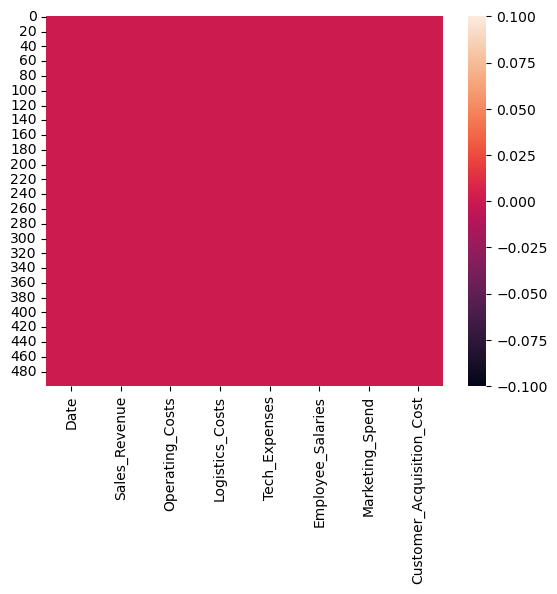

In [6]:
# Confirming if the data has missing values and visualizig it using heatmap
sns.heatmap(df1.isnull())

It is noted that there are no missing values in the dataset

In [7]:
# Checking the data Statistics
df1.describe()

,Date,Sales_Revenue,Operating_Costs,Logistics_Costs,Tech_Expenses,Employee_Salaries,Marketing_Spend,Customer_Acquisition_Cost
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2023-09-07 12:00:00,126884.482000,52932.894000,17917.856000,8991.370000,41588.374000,15196.946000,29.419569
min,2023-01-01 00:00:00,50769.000000,20055.000000,5060.000000,3001.000000,10163.000000,5040.000000,10.005388
25%,2023-05-05 18:00:00,88346.000000,36061.750000,11996.750000,6078.750000,27628.750000,10417.500000,20.783358
50%,2023-09-07 12:00:00,132892.000000,52786.000000,18136.500000,9107.500000,41524.500000,15430.500000,29.065609
75%,2024-01-10 06:00:00,164557.250000,70364.250000,24176.500000,12206.000000,56695.250000,20299.500000,38.920939
max,2024-05-14 00:00:00,199783.000000,89836.000000,29951.000000,14996.000000,69945.000000,24988.000000,49.912834
std,NaN,43779.964525,20013.127016,7330.888533,3557.175229,16956.831255,5791.791937,11.503693


It is noted that there are a little difference between the mean and median of these data, which may suggest the presence of outliers, that needs to be further investigated

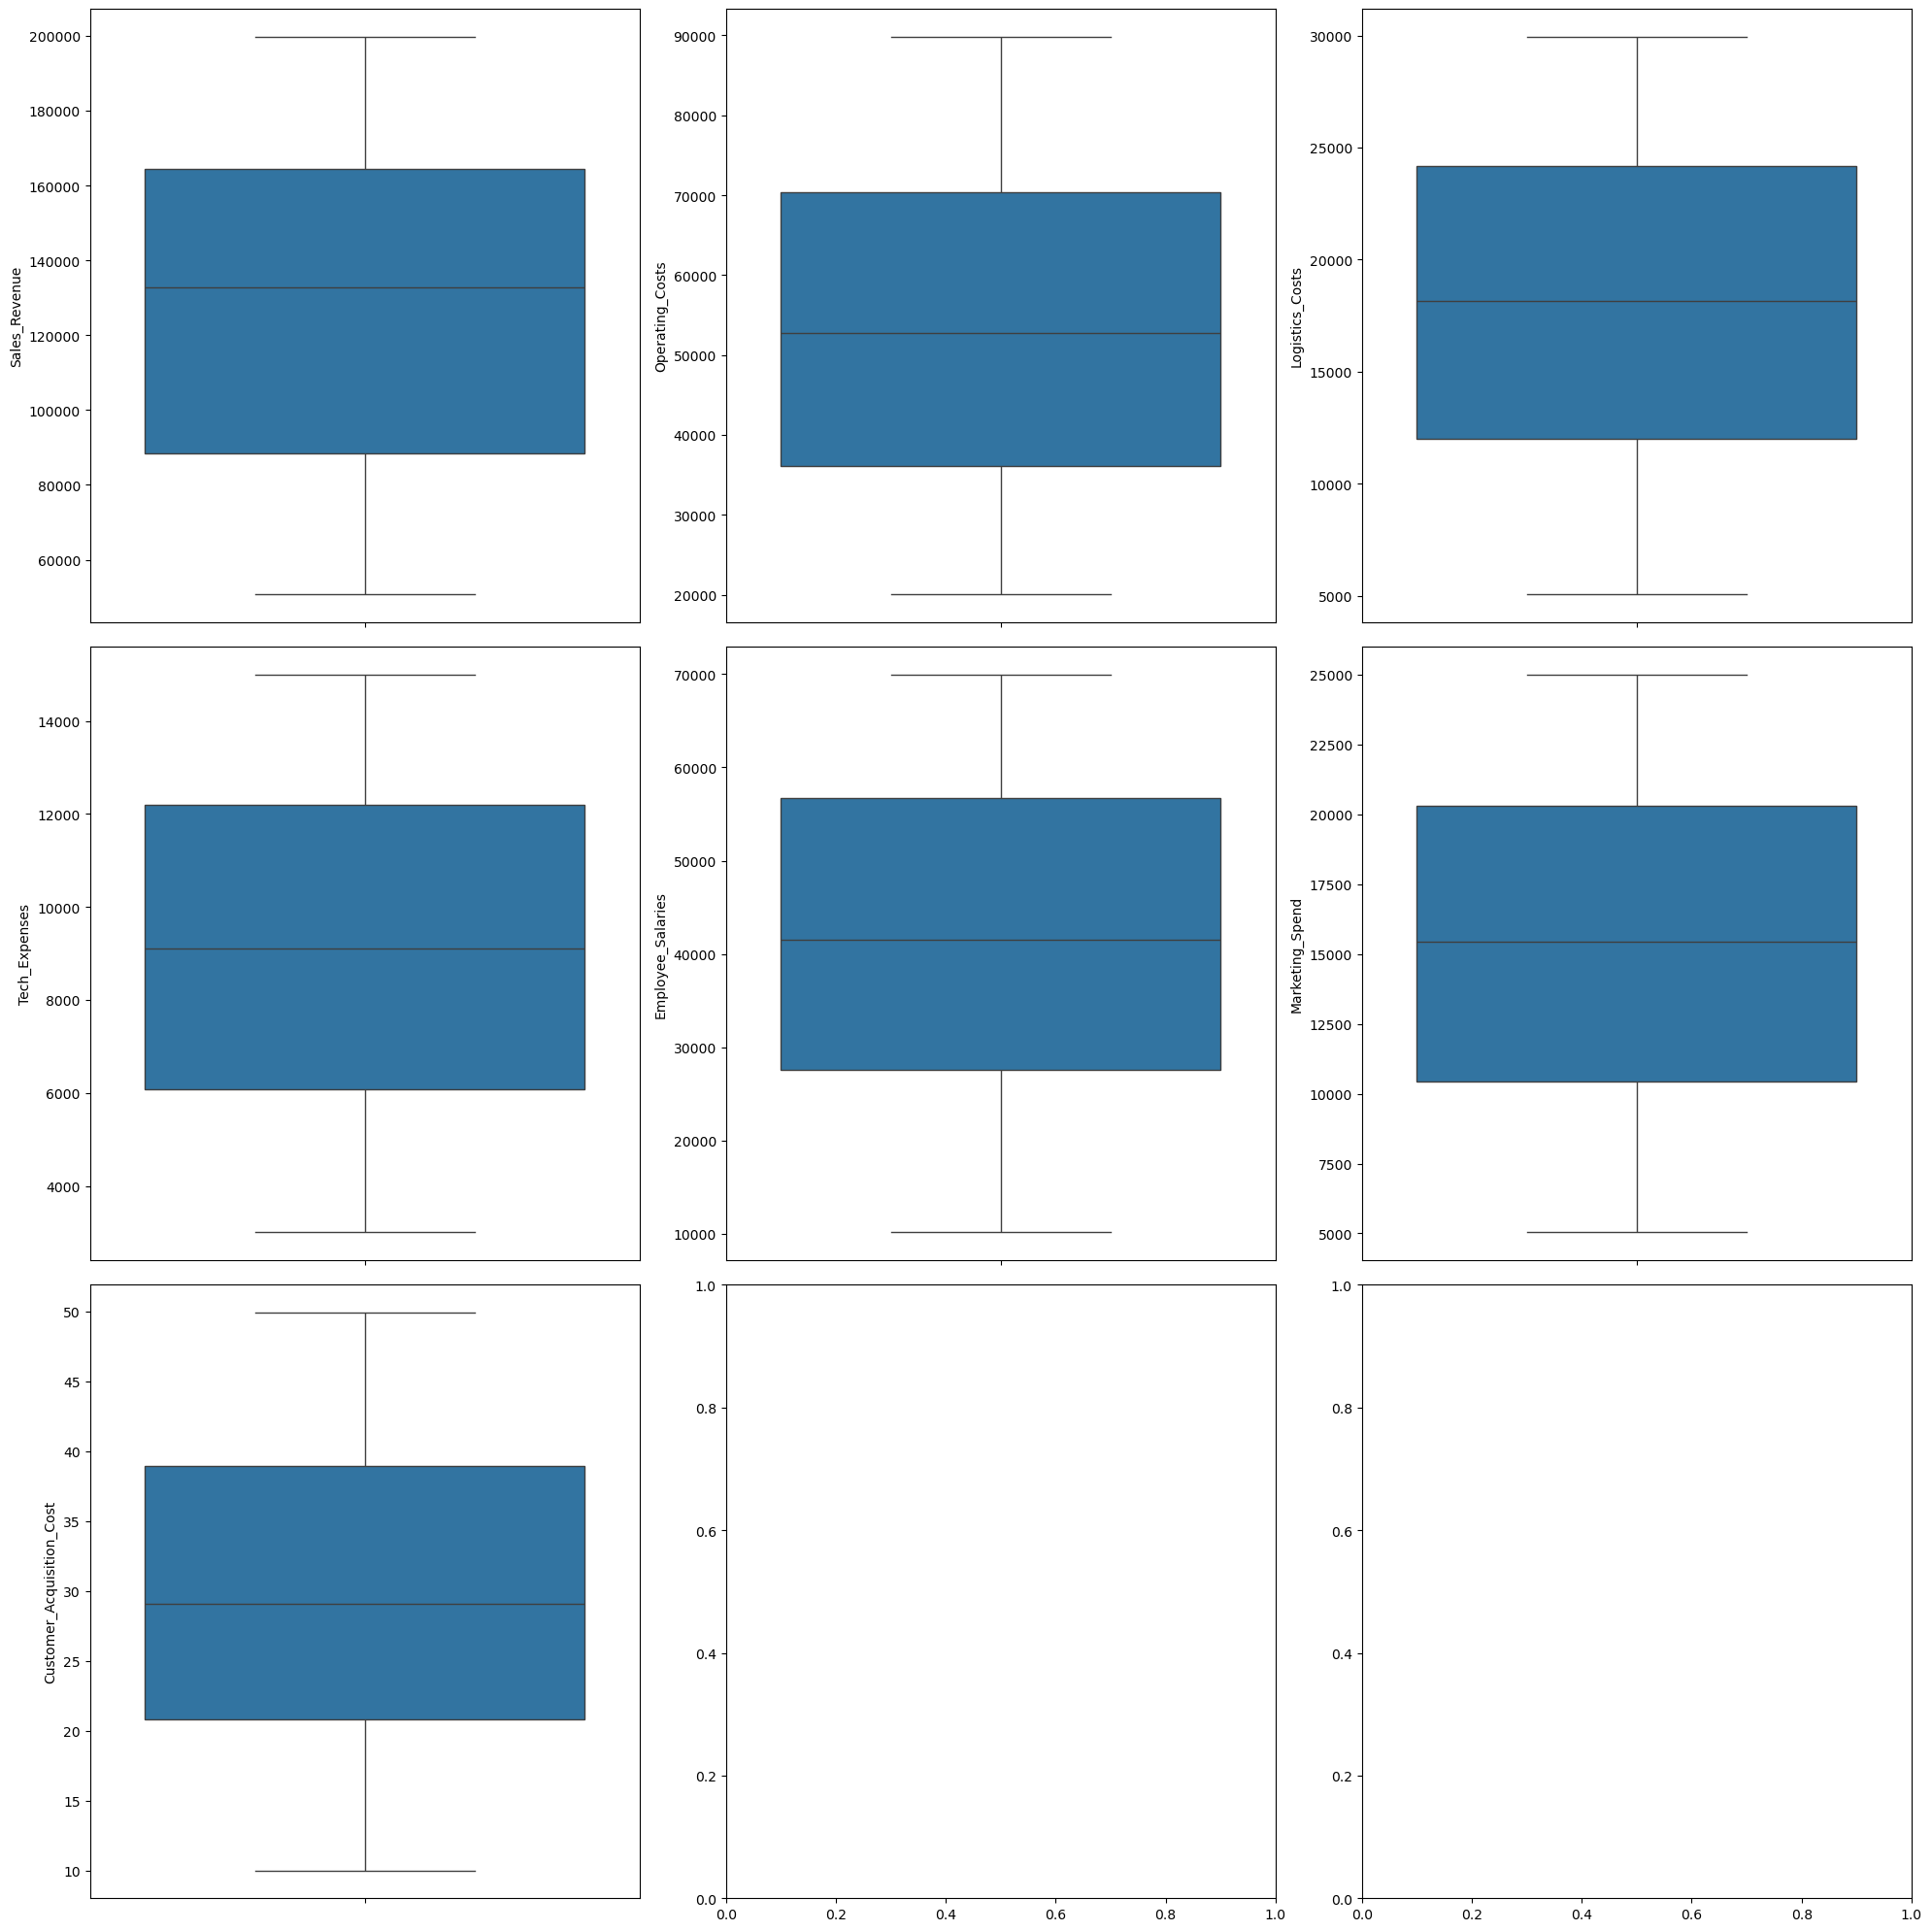

In [8]:
# Confirming the presence of outliers

fig, position = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df1.select_dtypes(include="number")):
    sns.boxplot(df1[column_name], ax=position[index])

plt.tight_layout()
plt.show();

The boxplots did not show the presence of outliers in the dataset

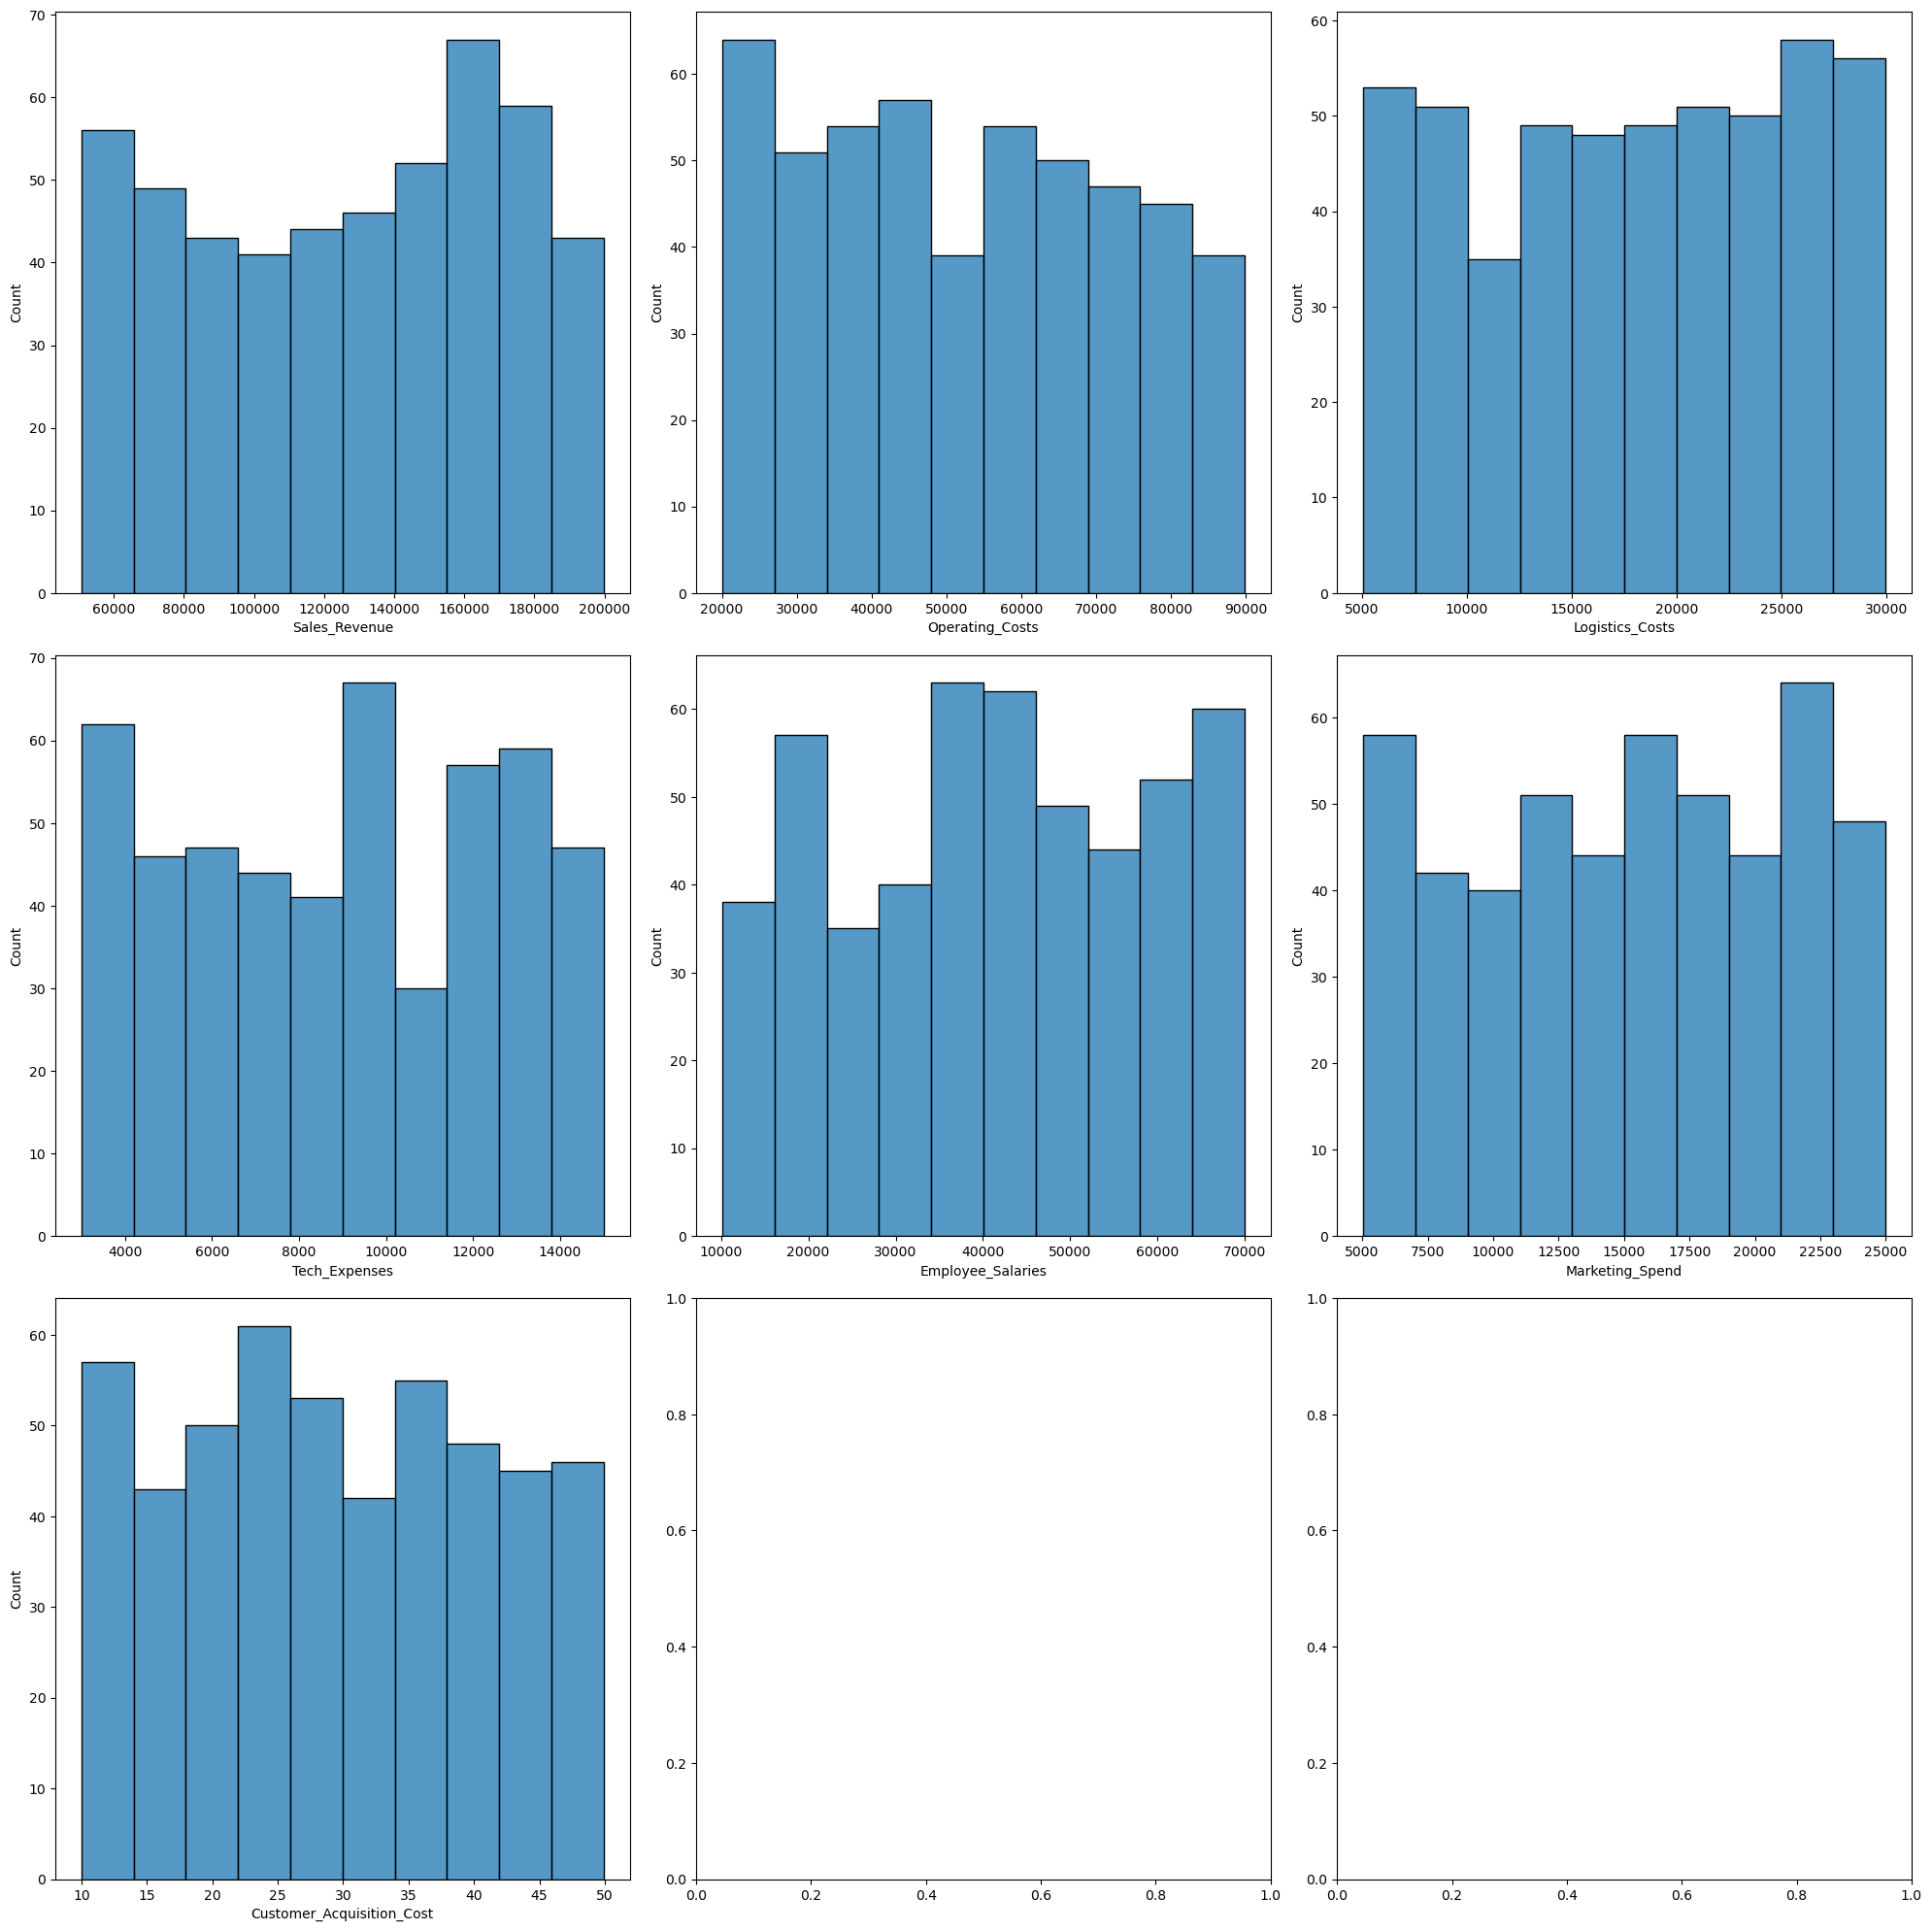

In [9]:
# Confirming the data distribution

fig, position = plt.subplots(nrows=3, ncols = 3, figsize=(20,20))
position = position.flatten()

for index, column_name in enumerate(df1.select_dtypes(include='number')):
    sns.histplot(df1[column_name], ax=position[index])

plt.tight_layout()
plt.show()

The data features appears to be slightly skewed

In [10]:
# Extracting the Year, Month and Quarter from the dataset

df1['Year'] = df1['Date'].dt.year

df1['Quarter'] = df1['Date'].dt.quarter

df1['Year_Month'] = df1['Date'].dt.strftime('%Y-%b')

# Create a 'Year-Quarter' column for better plotting
df1['Year_Quarter'] = df1['Year'].astype(str) + '-Q' + df1['Quarter'].astype(str)

# Ensure correct sorting
df1 = df1.sort_values(by=['Year', 'Quarter'])
df1.head(2)

,Date,Sales_Revenue,Operating_Costs,Logistics_Costs,Tech_Expenses,Employee_Salaries,Marketing_Spend,Customer_Acquisition_Cost,Year,Quarter,Year_Month,Year_Quarter
0,2023-01-01,171958,26801,11150,4980,33711,20997,45.700932,2023,1,2023-Jan,2023-Q1
1,2023-01-02,196867,68136,9425,13047,36122,19215,27.735201,2023,1,2023-Jan,2023-Q1


## Trend Analysis Over Time

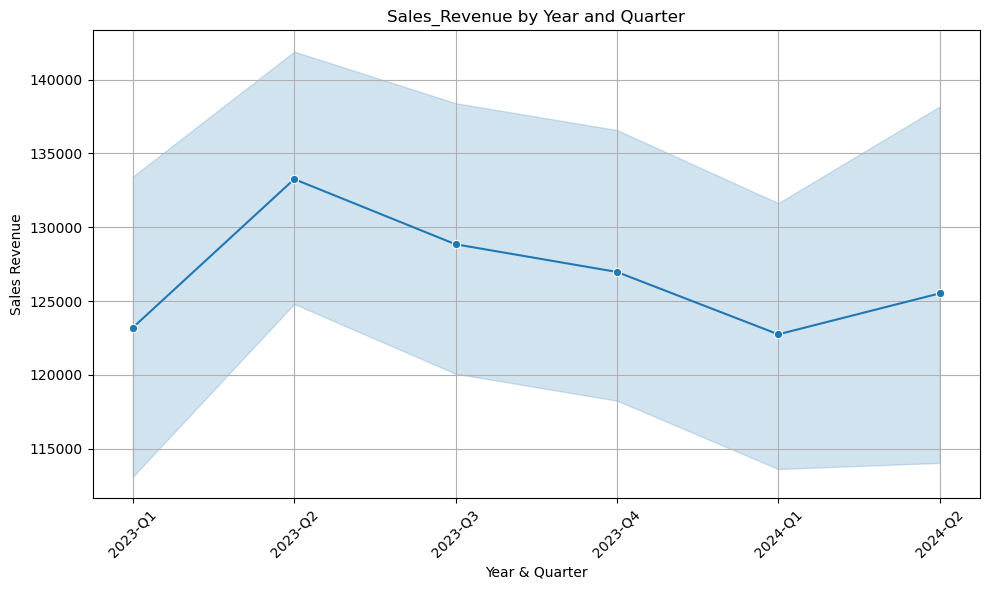

In [11]:
# Reviewing and visualizing the sales revenue per year and quarter


plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Sales_Revenue', data=df1, marker='o')
plt.title('Sales_Revenue by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The Sales revenue peaked in Q2 and shows a consistent decline thereafter

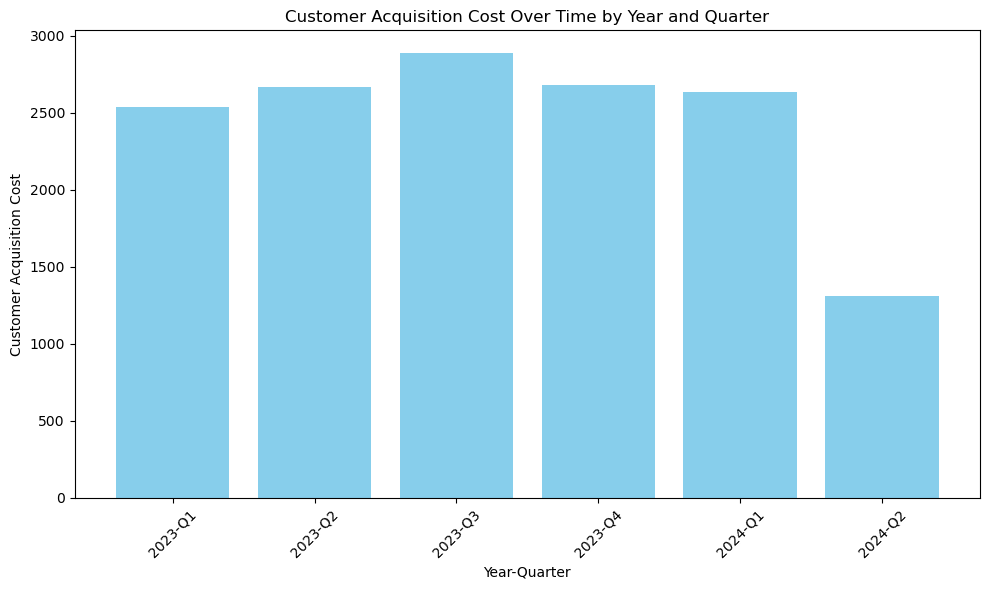

In [12]:
#customer Aquisition cost per year and Quater
cac_per_period = df1.groupby('Year_Quarter')['Customer_Acquisition_Cost'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(cac_per_period['Year_Quarter'].astype(str), cac_per_period['Customer_Acquisition_Cost'], color='skyblue')
plt.xlabel('Year-Quarter')
plt.ylabel('Customer Acquisition Cost')
plt.title('Customer Acquisition Cost Over Time by Year and Quarter')
plt.xticks(rotation=45)   # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

There is a steady increase in the cost per aquisition for customers in the early quarter of the year which peaks at the 3rd quarter 2023 Q3 and then a falls in the 4th quarter 2023 Q4

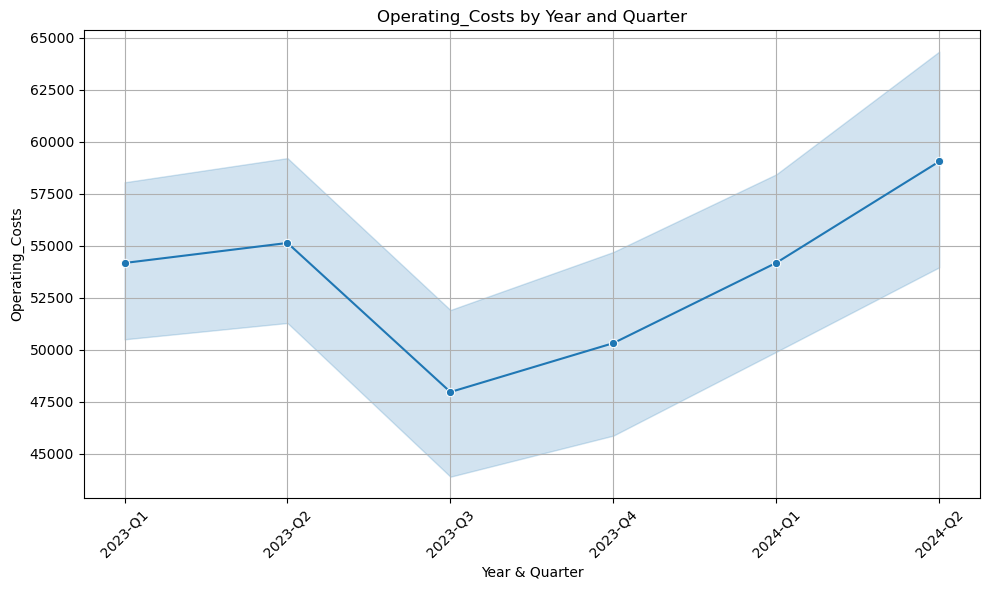

In [13]:
# Reviewing and visualizing the Operating_Costs per year and quarter

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Operating_Costs', data=df1, marker='o')
plt.title('Operating_Costs by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Operating_Costs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Operating costs declined in 2023-Q3 but steadily increased thereafter, reaching its highest point in 2024-Q2.

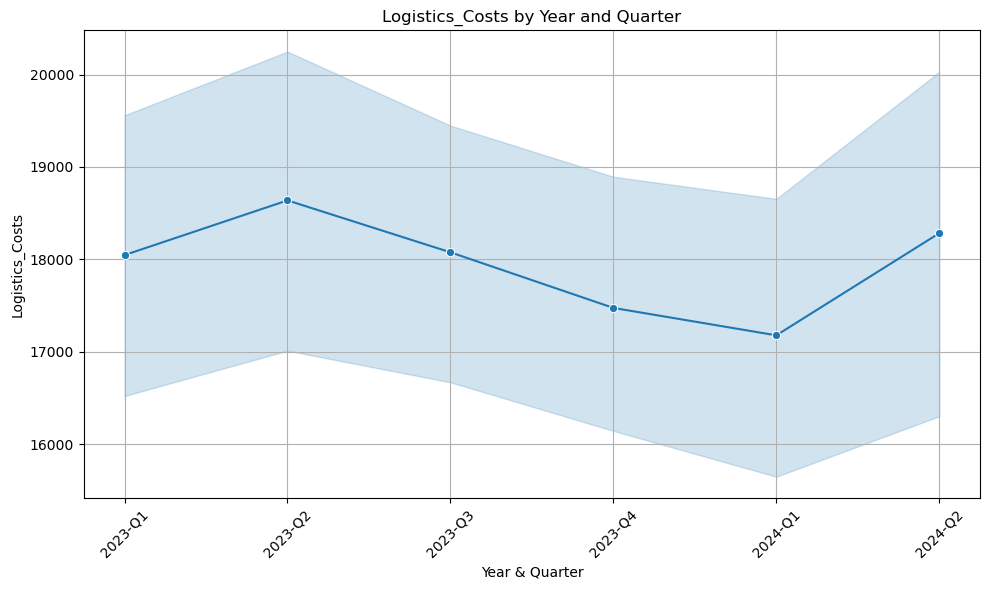

In [14]:
# Reviewing and visualizing the Logistics_Costs per year and quarter

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Logistics_Costs', data=df1, marker='o')
plt.title('Logistics_Costs by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Logistics_Costs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The Logistics costs picked in the 2nd quarter and steadyily declined till 2024 Q1 and picked up again

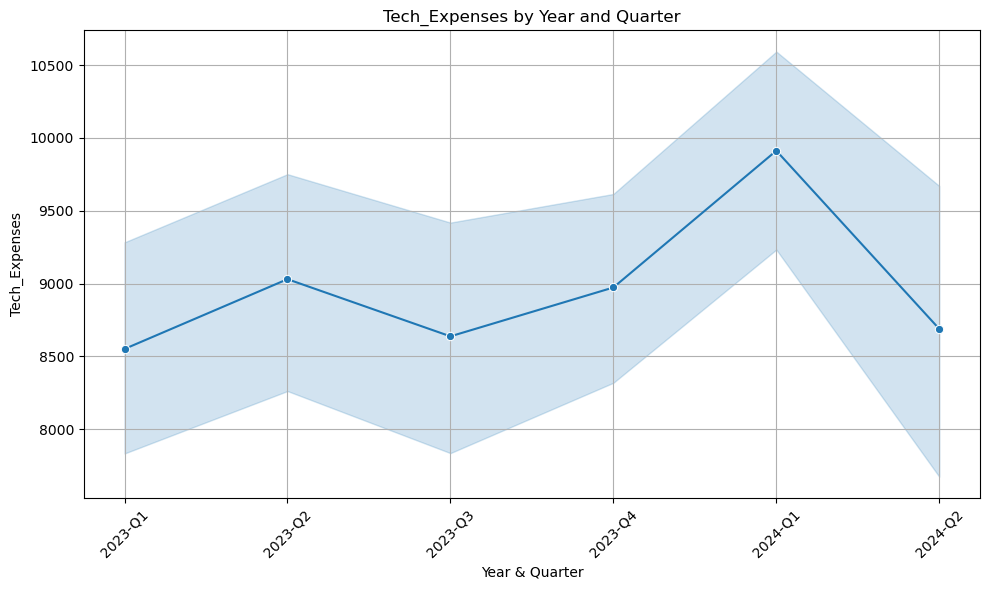

In [15]:
# Reviewing and visualizing the Logistics_Costs per year and quarter

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Tech_Expenses', data=df1, marker='o')
plt.title('Tech_Expenses by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Tech_Expenses')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The tech expense is seen to have fluctuated each quarter and eventually picked in 024 Q1 and a sharp decline seen in Quarter 2

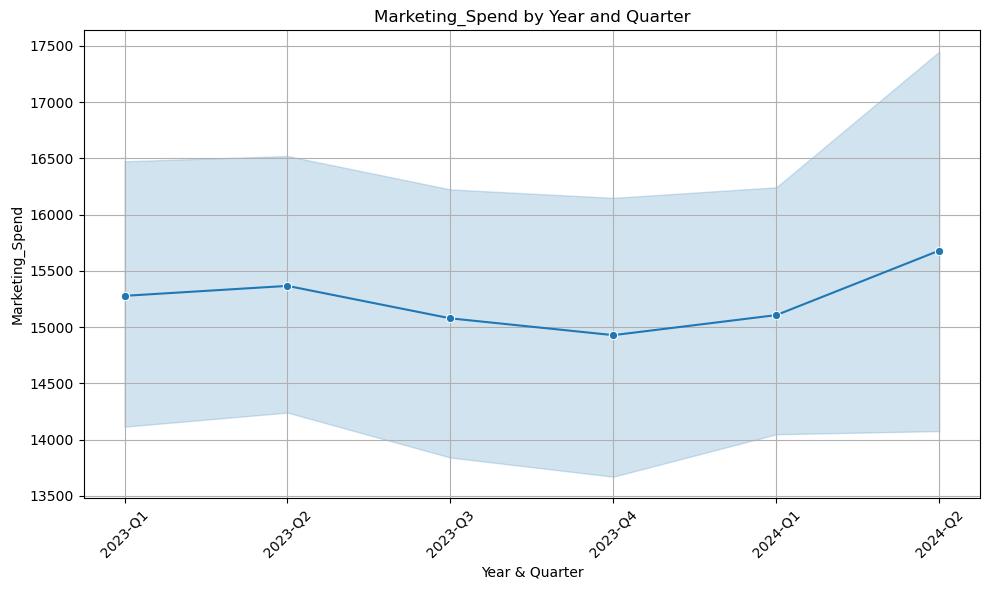

In [16]:
# Reviewing and visualizing the Marketing_Spend per year and quarter

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Marketing_Spend', data=df1, marker='o')
plt.title('Marketing_Spend by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Marketing_Spend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The marketing spend seems to have fluctuated within the same range across the year

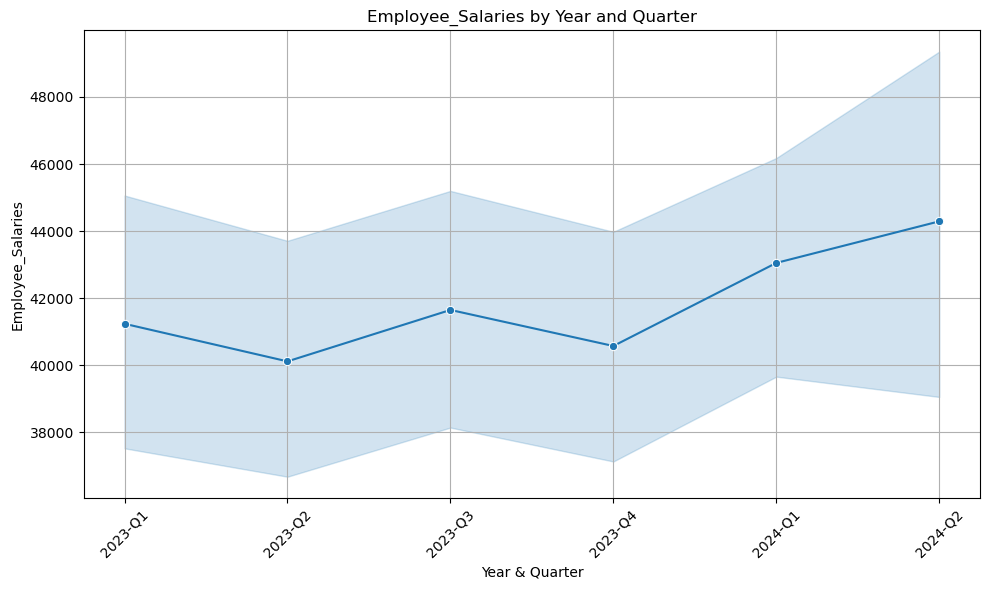

In [17]:
# Reviewing and visualizing the Employee_Salaries per year and quarter

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Quarter', y='Employee_Salaries', data=df1, marker='o')
plt.title('Employee_Salaries by Year and Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Employee_Salaries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A fluctuating but steady increase in Employee salaries noted across the year 

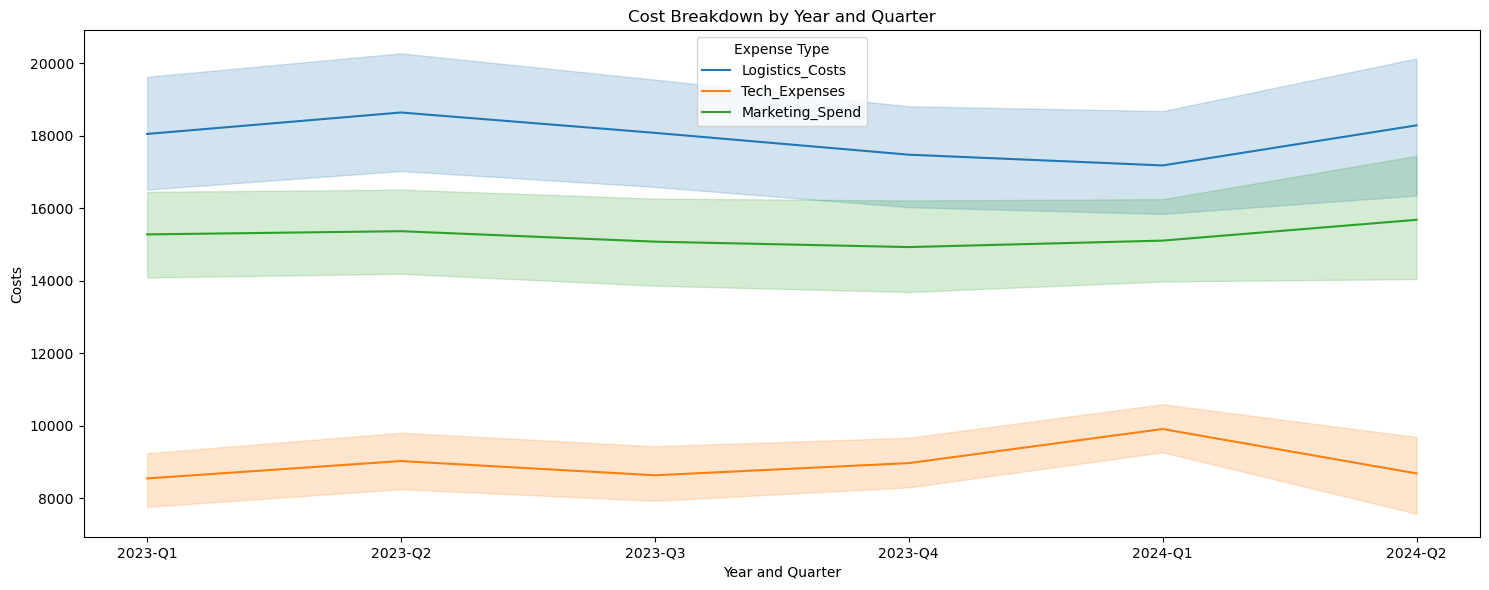

In [18]:
df1_melted = df1.melt(id_vars='Year_Quarter', value_vars=['Logistics_Costs', 'Tech_Expenses', 'Marketing_Spend']) 

plt.figure(figsize=(15, 6))
sns.lineplot(data = df1_melted, x='Year_Quarter', y='value', hue='variable')
plt.title('Cost Breakdown by Year and Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Costs')
plt.legend(title='Expense Type')
plt.tight_layout()
plt.show()

Logistics Costs is the highest among all expenses and it steadily increased in 2024-Q2.

Tech Expenses peaked slightly in 2024-Q1 but dropped in Q2, reason needs to be further determined.

Marketing Spend remained relatively stable but showed a gradual increase toward 2024-Q2.

## Profit Analysis

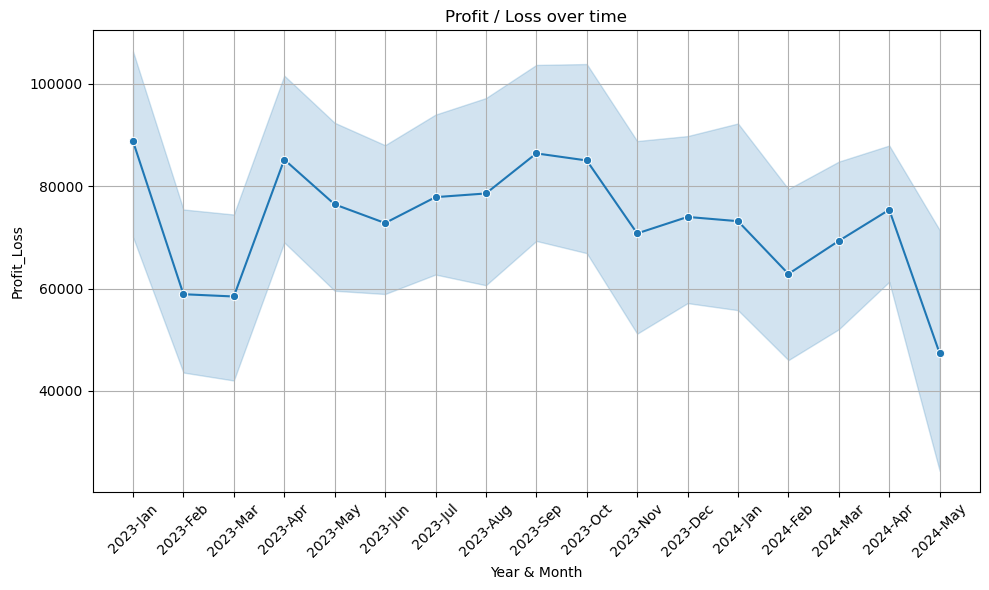

In [19]:
# Creating a profit/loss column in an attempt to determine profit or loss and visualizing it

df1['Profit_Loss'] = df1['Sales_Revenue']  - df1['Operating_Costs']
df1.head(2) 

plt.figure(figsize=(10,6))
sns.lineplot(x='Year_Month', y='Profit_Loss', data=df1, marker='o')
plt.title('Profit / Loss over time')
plt.xlabel('Year & Month')
plt.ylabel('Profit_Loss')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Profit peaked in January 2023 and April 2023, but significantly declined by May 2024.

There's a relatively stable range in profits between June 2023 and March 2024, even though some fluctuations are noted.

Theres a drop in profit in February and May 2024 that may need to be confirmed.

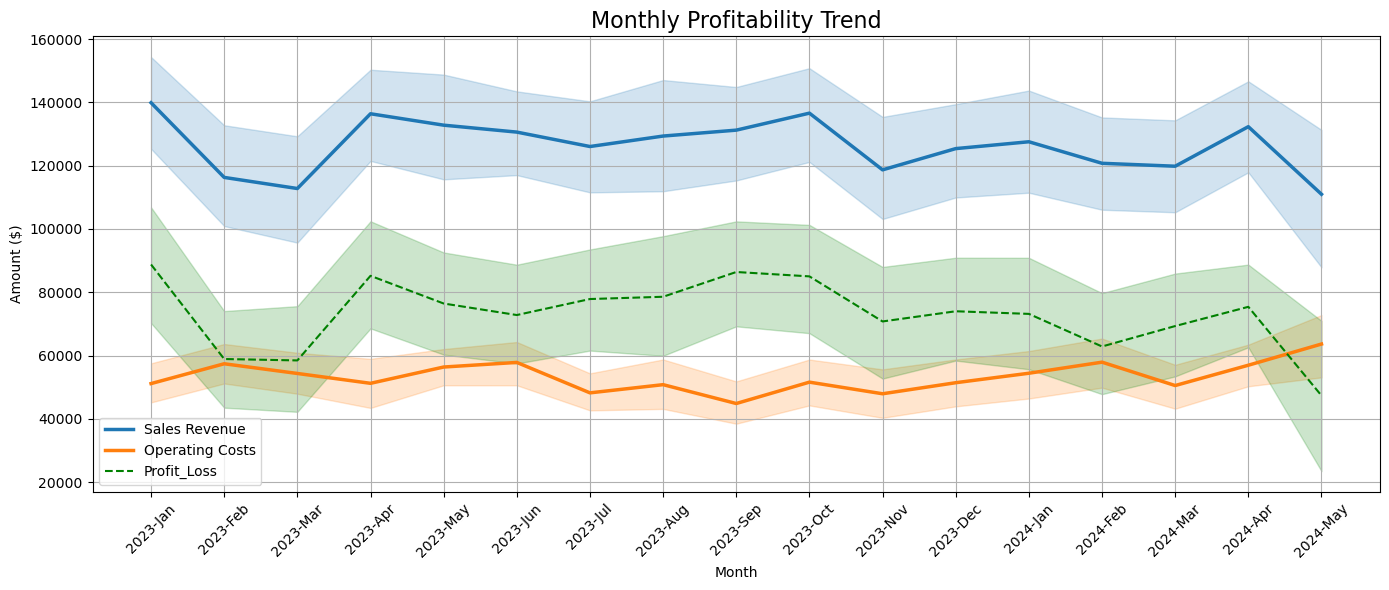

In [20]:
# Comparing and visualizing the relationship between Sales, Operating Costs and Profit over Time

plt.figure(figsize=(14, 6))
sns.lineplot(data=df1, x='Year_Month', y='Sales_Revenue', label='Sales Revenue', linewidth=2.5)
sns.lineplot(data=df1, x='Year_Month', y='Operating_Costs', label='Operating Costs', linewidth=2.5)
sns.lineplot(data=df1, x='Year_Month', y='Profit_Loss', label='Profit_Loss', linestyle='--', color='green')


plt.title("Monthly Profitability Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20484\1988828064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Logistics_Cost_Range', y='Sales_Revenue', palette='Set1')


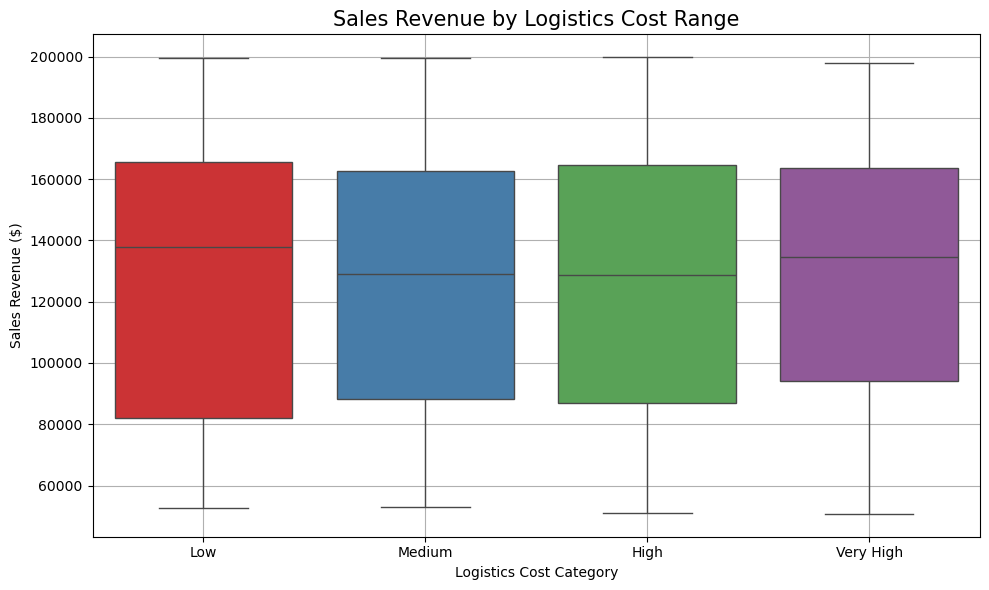

In [21]:
# Grouping logistics cost into ranges and comparing the distribution of revenue in each.

# Bin logistics costs into categories
df1['Logistics_Cost_Range'] = pd.qcut(df1['Logistics_Costs'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Visualizing the Logistics cost categories using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Logistics_Cost_Range', y='Sales_Revenue', palette='Set1')
plt.title('Sales Revenue by Logistics Cost Range', fontsize=15)
plt.xlabel('Logistics Cost Category')
plt.ylabel('Sales Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Cost Analysis

Reviewing the different cost related features to determine what percentage of each contributes to the operating costs.   

In [22]:
# Attempting to evaluate the contribution of the different Cost Category in relation to the Operating Costs column

cost_cols = ['Logistics_Costs', 'Tech_Expenses', 'Employee_Salaries', 'Marketing_Spend', 'Customer_Acquisition_Cost']

# Sum each cost category across all time
cost_contributions = df1[cost_cols].sum().reset_index()
cost_contributions.columns = ['Category', 'Total_Cost']

# Calculate percentage contribution
cost_contributions['Percentage'] = (cost_contributions['Total_Cost'] / cost_contributions['Total_Cost'].sum()) * 100

print(cost_contributions.sort_values(by='Percentage', ascending=False))


                    Category    Total_Cost  Percentage
2          Employee_Salaries  2.079419e+07   49.673201
0            Logistics_Costs  8.958928e+06   21.401108
3            Marketing_Spend  7.598473e+06   18.151250
1              Tech_Expenses  4.495685e+06   10.739303
4  Customer_Acquisition_Cost  1.470978e+04    0.035139


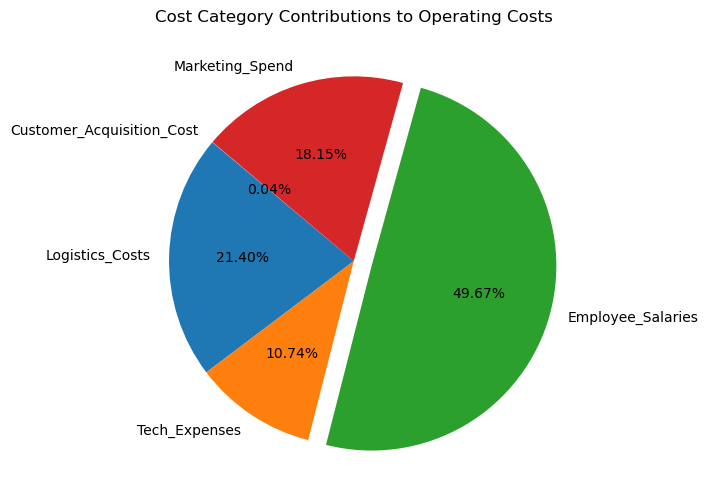

In [23]:
# Visualizing the cost categories using Pie Chart

# Create the explode list before plotting
explode = [
    0.1 if category == 'Employee_Salaries' else 0
    for category in cost_contributions['Category']
]

plt.figure(figsize=(7, 7))
plt.pie(
    cost_contributions['Total_Cost'], 
    labels=cost_contributions['Category'], 
    autopct='%1.2f%%', 
    startangle=140,
    explode=explode  # <-- this separates the desired slice
    #wedgeprops=dict(width=0.4)  # Optional: donut-style
)
plt.title('Cost Category Contributions to Operating Costs')
plt.tight_layout()
plt.show()

From the pie chart above, about 50% of the operating cost is from the Employees' salaries, making it the highest contributing factor to the operating cost, 21% from Logistics cost. 18% from Marketing spends and 11% from tech

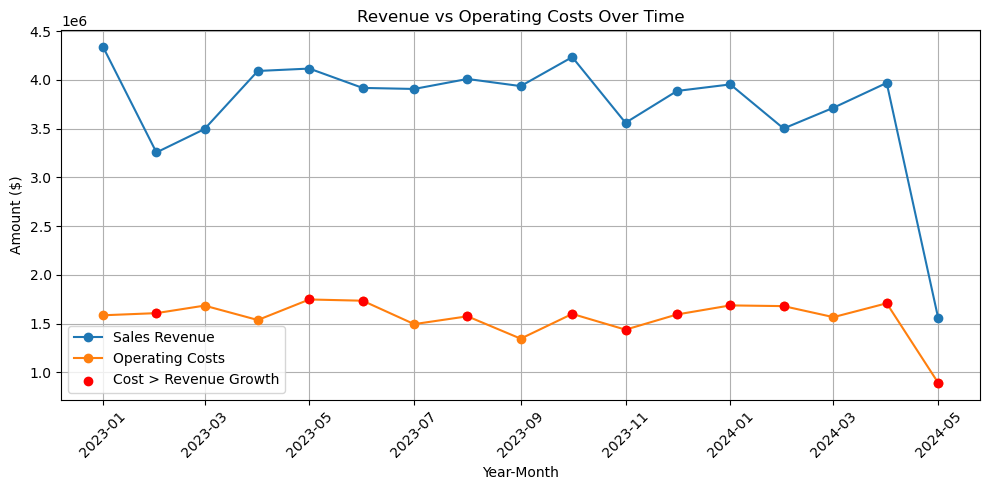

In [24]:
# Reviewing reveue and operating cost over time

# Convert 'year_month' string like '2023-Jan' to datetime
df1['Year_Month'] = pd.to_datetime(df1['Year_Month'], format='%Y-%b')

# Group by 'year_month'
df1_monthly = df1.groupby('Year_Month').agg({
    'Sales_Revenue': 'sum',
    'Operating_Costs': 'sum'
}).reset_index()

# Calculate month-over-month growth rates
df1_monthly['Revenue_Growth'] = df1_monthly['Sales_Revenue'].pct_change()
df1_monthly['Cost_Growth'] = df1_monthly['Operating_Costs'].pct_change()

# Flag months where costs grew faster than revenue
df1_monthly['Costs_Grow_Faster'] = df1_monthly['Cost_Growth'] > df1_monthly['Revenue_Growth']

# Specifying the months where cost grew faster
faster_cost_months = df1_monthly[df1_monthly['Costs_Grow_Faster'] == True]
#print(faster_cost_months[['Year_Month', 'Revenue_Growth', 'Cost_Growth']])


# Display results
#print(df1_monthly)

# Optional: visualize it
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df1_monthly['Year_Month'], df1_monthly['Sales_Revenue'], label='Sales Revenue', marker='o')
plt.plot(df1_monthly['Year_Month'], df1_monthly['Operating_Costs'], label='Operating Costs', marker='o')
plt.xticks(rotation=45)

# Highlight months where costs grew faster than revenue
highlight = df1_monthly[df1_monthly['Costs_Grow_Faster']]
plt.scatter(highlight['Year_Month'], highlight['Operating_Costs'], color='red', label='Cost > Revenue Growth', zorder=5)

plt.title('Revenue vs Operating Costs Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

from 2023-Jan to 2023-Jun, Revenue starts high in Jan, declines in Feb, and climbs steadily through to mid-2023.

from 2023-Jul to 2024-Mar, Revenue remains relatively stable with mild ups and downs.

from 2024-Apr to 2024-May, There's a sharp drop in revenue likely not a growth trend but a performance issue or data gap.

Costs are relatively flat across the whole period.

There's no clear upward or downward growth.

In [25]:
df1.head(2)

,Date,Sales_Revenue,Operating_Costs,Logistics_Costs,Tech_Expenses,Employee_Salaries,Marketing_Spend,Customer_Acquisition_Cost,Year,Quarter,Year_Month,Year_Quarter,Profit_Loss,Logistics_Cost_Range
0,2023-01-01,171958,26801,11150,4980,33711,20997,45.700932,2023,1,2023-01-01,2023-Q1,145157,Low
1,2023-01-02,196867,68136,9425,13047,36122,19215,27.735201,2023,1,2023-01-01,2023-Q1,128731,Low


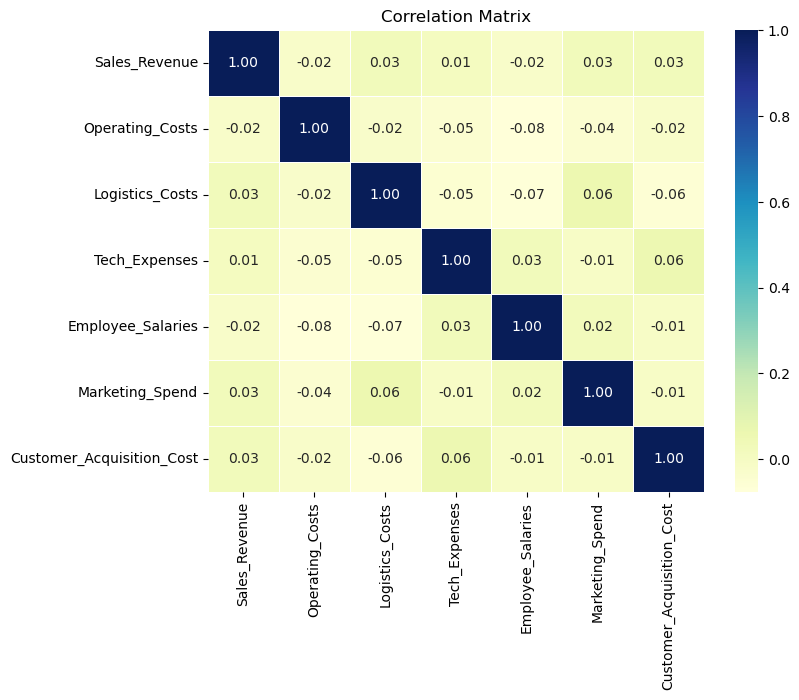

In [26]:
correlation = df1[['Sales_Revenue', 'Operating_Costs', 'Logistics_Costs', 'Tech_Expenses', 'Employee_Salaries', 'Marketing_Spend', 'Customer_Acquisition_Cost',]].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Exploring the HR_Workforce Dataset

In [27]:
df2.head(2)

,Employee_ID,Department,Job_Role,Salary ($),Work_Hours,Productivity_Score,Attrition_Flag
0,1,IT,Manager,65098,56,0.656938,0
1,2,Sales,Analyst,51225,58,0.769011,0


In [28]:
# Confirming the data information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         300 non-null    int64  
 1   Department          300 non-null    object 
 2   Job_Role            300 non-null    object 
 3   Salary ($)          300 non-null    int64  
 4   Work_Hours          300 non-null    int64  
 5   Productivity_Score  300 non-null    float64
 6   Attrition_Flag      300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [29]:
# Checking for duplicates
df2.duplicated().sum()

0

<Axes: >

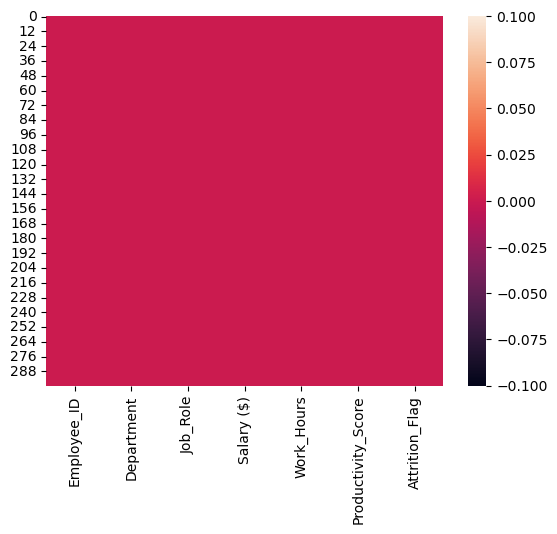

In [30]:
# confirming if the data has missing values and visualizig it using heatmap
sns.heatmap(df2.isnull())

In [31]:
# Checkig the data Statistics
df2.describe()

,Employee_ID,Salary ($),Work_Hours,Productivity_Score,Attrition_Flag
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,72257.356667,46.056667,0.735976,0.193333
std,86.746758,27458.345354,7.870192,0.142517,0.395572
min,1.000000,30136.000000,30.000000,0.460000,0.000000
25%,75.750000,51197.000000,40.000000,0.614913,0.000000
50%,150.500000,71205.500000,46.000000,0.729362,0.000000
75%,225.250000,92176.250000,52.000000,0.854186,0.000000
max,300.000000,210848.000000,60.000000,0.999779,1.000000


IndexError: index 4 is out of bounds for axis 0 with size 4

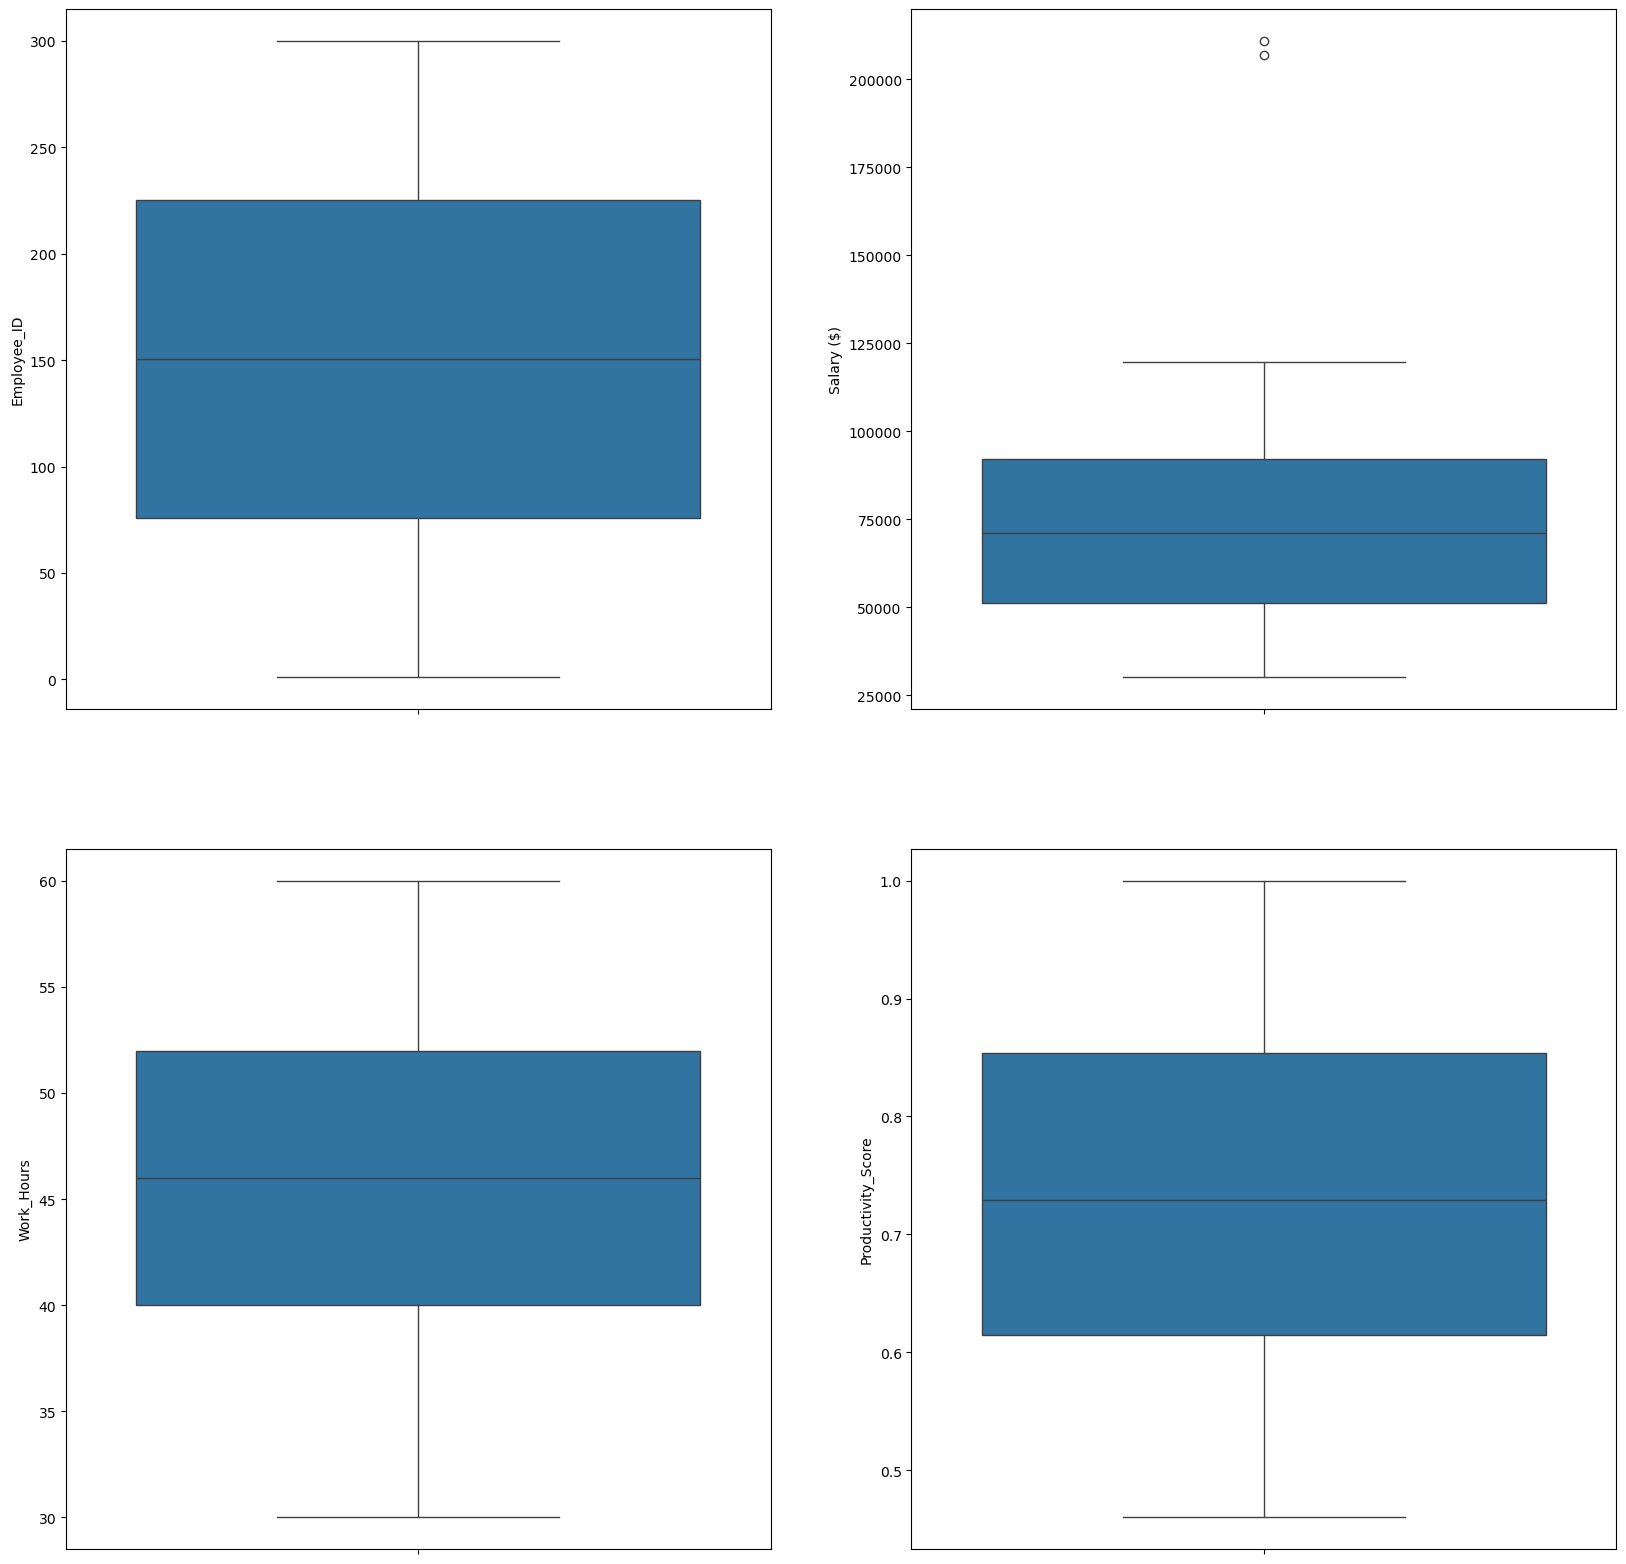

In [32]:
# Confirming the presence of outliers

fig, position = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df2.select_dtypes(include="number")):
    sns.boxplot(df2[column_name], ax=position[index])

plt.tight_layout()
plt.show();

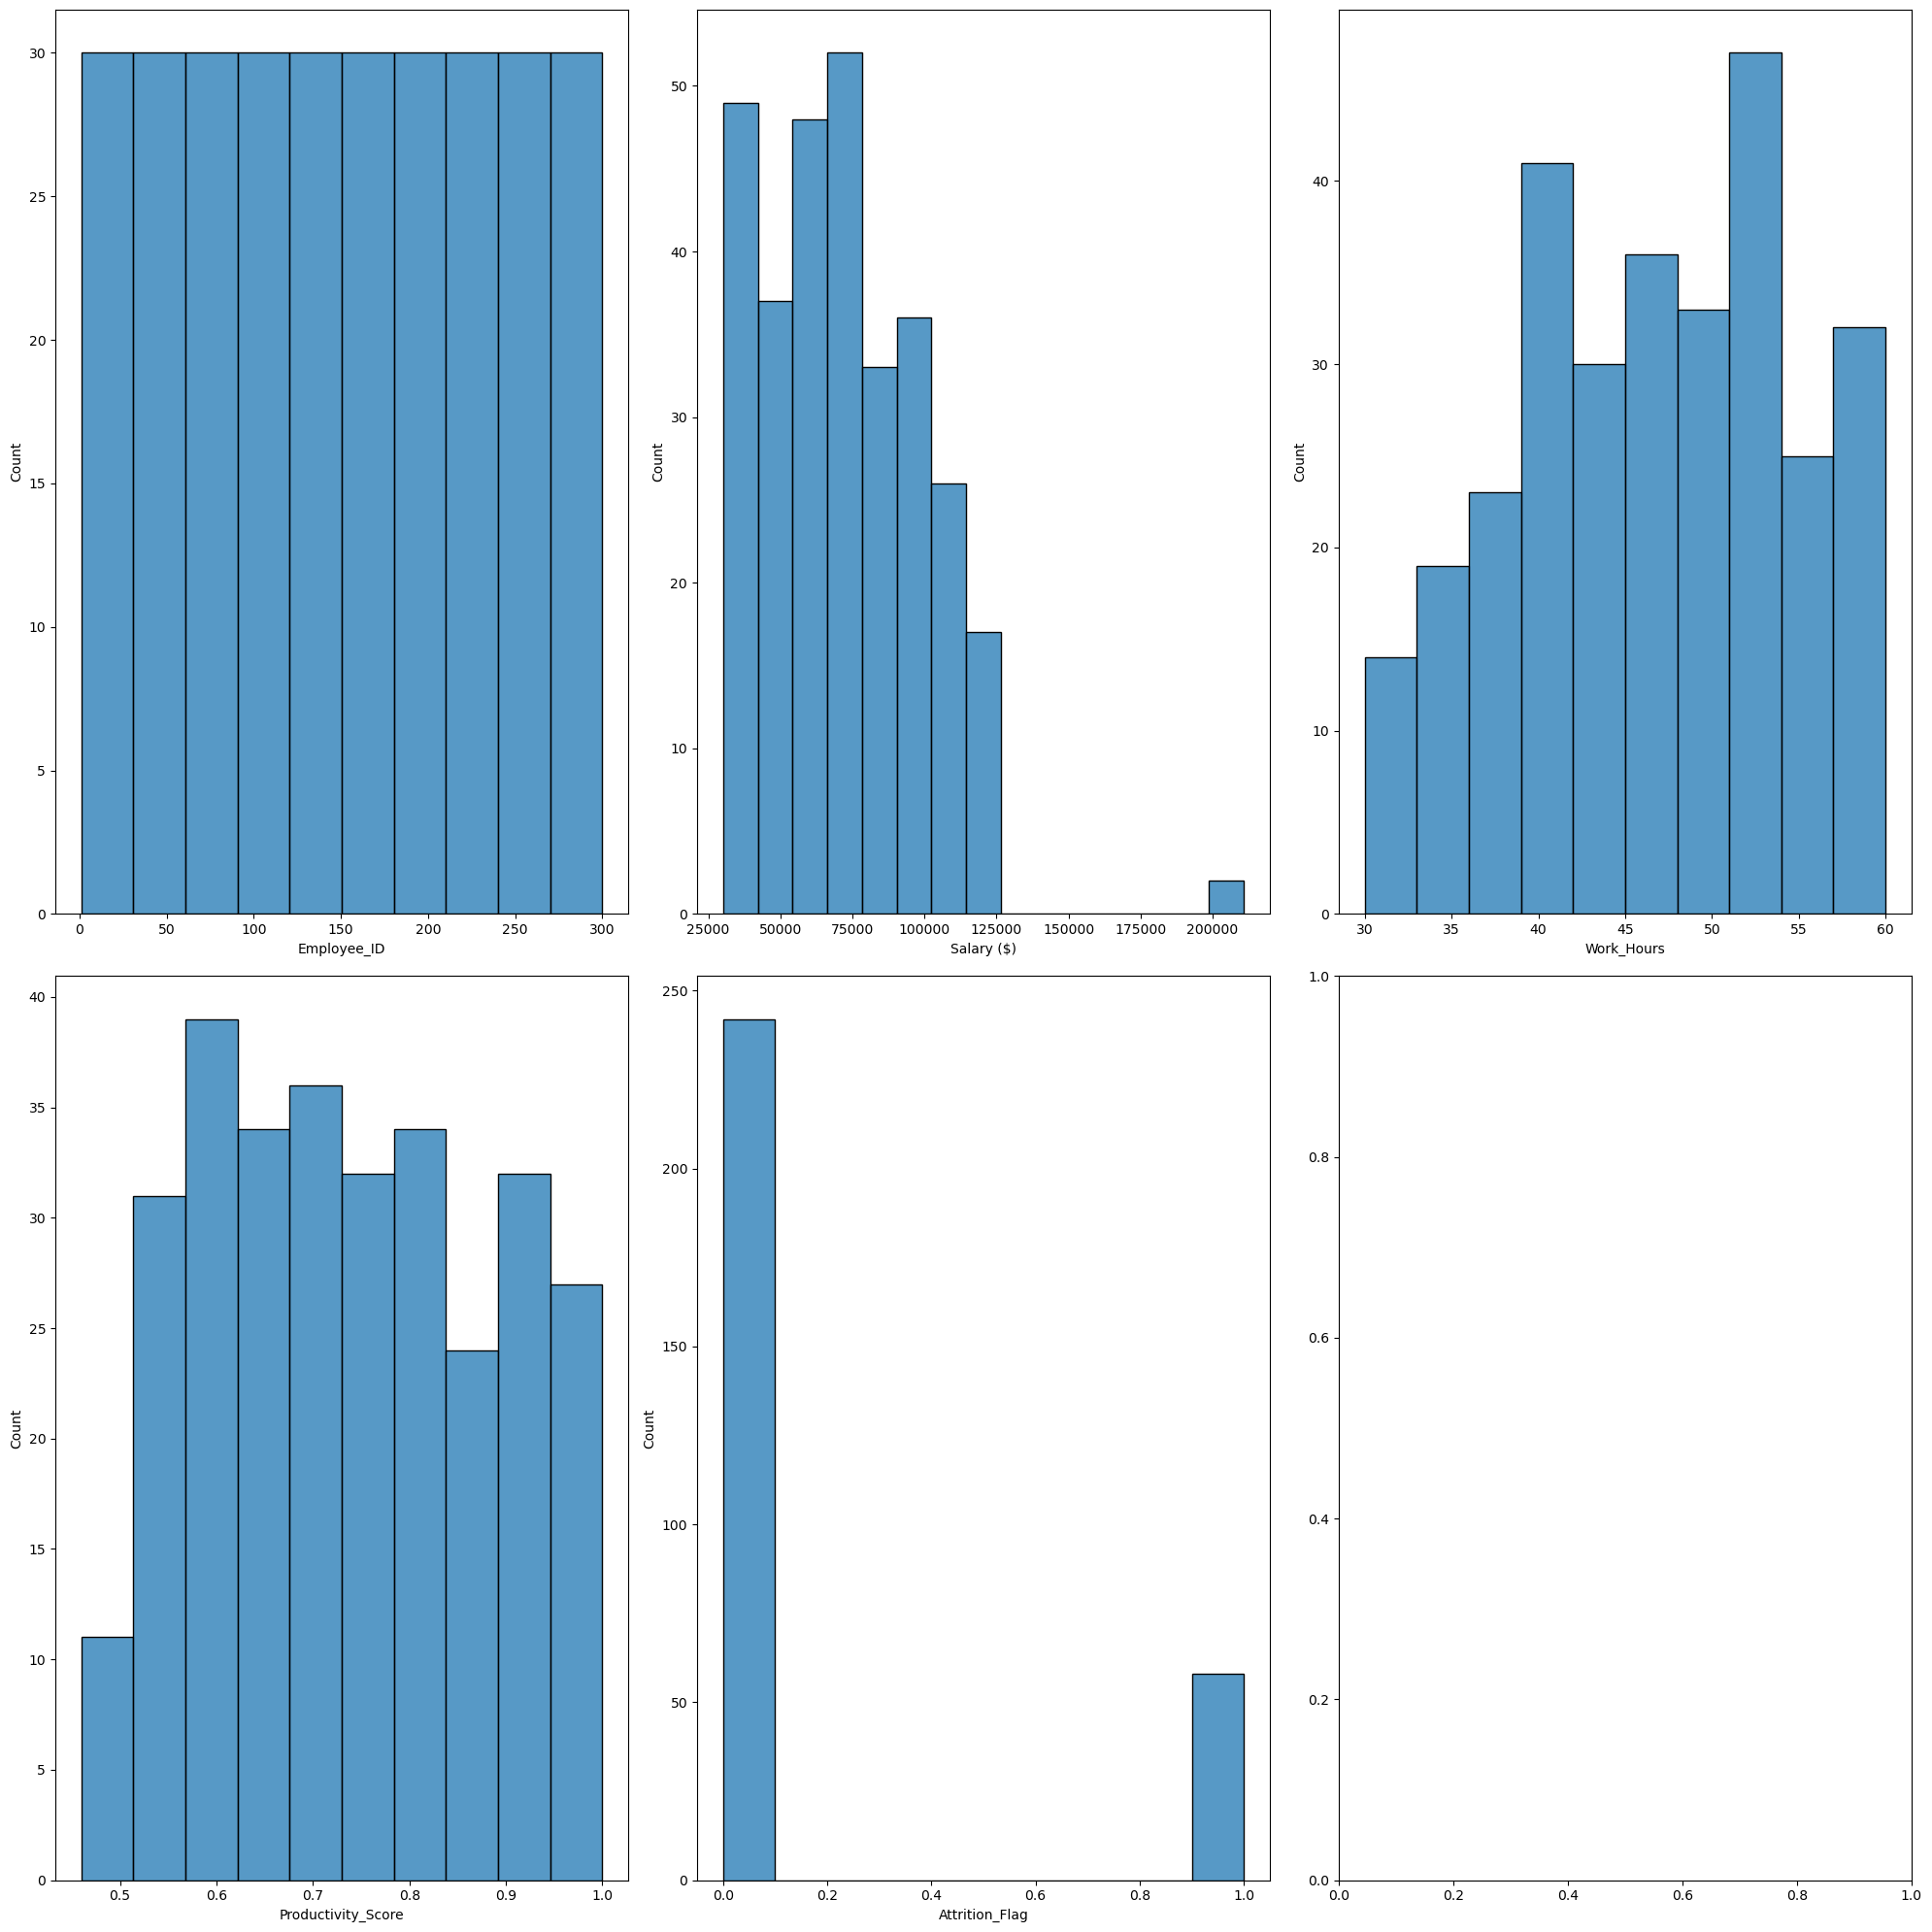

In [33]:
# Confirming the data distribution

fig, position = plt.subplots(nrows=2, ncols = 3, figsize=(20,20))
position = position.flatten()

for index, column_name in enumerate(df2.select_dtypes(include='number')):
    sns.histplot(df2[column_name], ax=position[index])

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20484\3954817160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df2, palette='pastel')


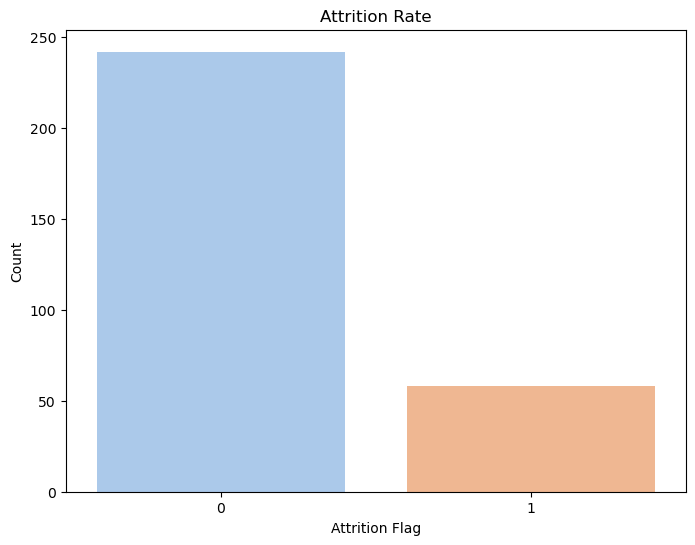

In [34]:
#Attrition Flag to understand Staff turnover rate
# Count plot for Attrition Flag
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_Flag', data=df2, palette='pastel')
plt.title('Attrition Rate')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

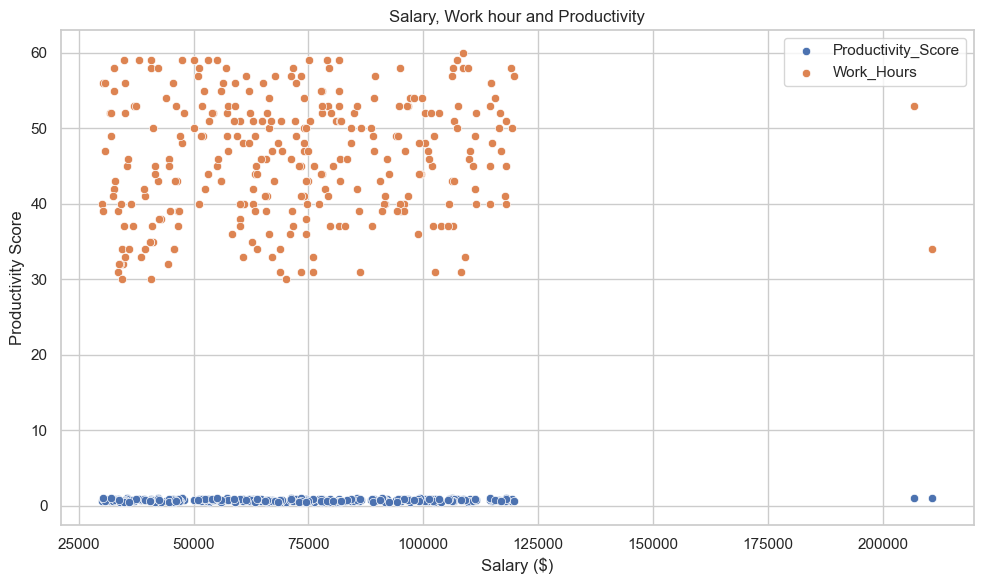

In [35]:
#Salary vs. Productivity
#Objective: Assess if there is a relationship between salary and productivity.

# Scatter plot for Salary vs Productivity Score

sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Salary ($)', y='Productivity_Score', data = df2, label='Productivity_Score')
sns.scatterplot(x='Salary ($)', y='Work_Hours', data = df2, label='Work_Hours')
plt.title('Salary, Work hour and Productivity')
plt.xlabel('Salary ($)')
plt.ylabel('Productivity Score')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Salary vs. Productivity
#Objective: Assess if there is a relationship between salary and productivity.

# Scatter plot for Salary vs Productivity Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary ($)', y='Productivity_Score', data=df2, color='green')
plt.title('Salary vs Productivity')
plt.xlabel('Salary ($)')
plt.ylabel('Productivity Score')
plt.show()

In [ ]:
# Box plot for Attrition vs Work Hours
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition_Flag', y='Work_Hours', data=df2, palette='coolwarm')
plt.title('Attrition vs Work Hours')
plt.xlabel('Attrition Flag')
plt.ylabel('Work Hours')
plt.show()

In [ ]:
#Productivity by Department and Job Role
#Objective: Analysing  how Productivity Score differs across Departments and Job Roles.
# Box plot for Productivity by Department and Job Role
plt.figure(figsize=(14, 8))
sns.barplot(x='Department', y='Productivity_Score', hue='Job_Role', data=df2, palette='Set1')
plt.title('Productivity by Department and Job Role')
plt.xlabel('Department')
plt.ylabel('Productivity Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Correlation Matrix
#How is Attrition,  work Hours,Productivity and Salary interrelated?
# Correlation matrix
correlation = df2[['Salary ($)', 'Work_Hours', 'Productivity_Score']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# df3 = pd.read_excel("Operational_Data for Opti.xlsx",engine = "openpyxl")
# df4 = pd.read_excel("Customer_Reviews for Opti.csv.xlsx",engine = "openpyxl")

In [ ]:
df4 = pd.read_excel("Customer_Reviews for Opti.csv.xlsx",engine = "openpyxl")
df4.head(2)